## Introduction to Matplotlib

### Using the matplotlib.pyplot interface

There are many ways to use Matplotlib. In this course, we will focus on the pyplot interface, which provides the most flexibility in creating and customizing data visualizations.

Initially, we will use the pyplot interface to create two kinds of objects: Figure objects and Axes objects.

This course introduces a lot of new concepts, so if you ever need a quick refresher, download the [Matplotlib Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/28b8210c-60cc-4f13-b0b4-5b4f2ad4790b) and keep it handy!

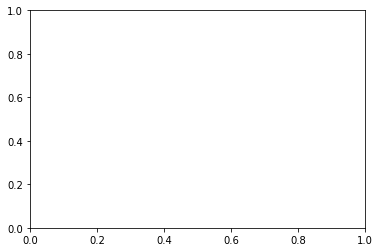

In [2]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

%matplotlib inline

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Call the show function to show the result
plt.show()

In [44]:
import pandas as pd

df = pd.read_csv("nrmavg.csv")
df1 = pd.read_csv("nrmpcp.csv")


austin_weather = df[df['CITY'].str.match('AUSTIN/CITY')]
austin_weather = austin_weather.drop(['CITY', 'STATE'], axis=1)
austin_weather = austin_weather.T
austin_weather.reset_index(inplace=True)
#austin_weather.rename(columns={"index": "MONTH", 226: "MEAN_TEMP"}, inplace = True)
austin_weather.columns = ['MONTH', 'MEAN_TEMP']

austin_precip = df1[df1['CITY'].str.match('AUSTIN/CITY')]
austin_precip = austin_precip.drop(['CITY', 'STATE'], axis=1)
austin_precip = austin_precip.T
austin_precip.reset_index(inplace=True)
austin_precip.columns = ['MONTH', 'NORM_PRECIP']
#display(austin_precip)

austin_weather = austin_weather.join(austin_precip["NORM_PRECIP"])

display(austin_weather)

seattle_weather = df[df['CITY'].str.match('SEATTLE C.O')]
seattle_weather = seattle_weather.drop(['CITY', 'STATE'], axis=1)
seattle_weather = seattle_weather.T
seattle_weather.reset_index(inplace=True)
seattle_weather.columns = ['MONTH', 'MEAN_TEMP']

seattle_precip = df1[df1['CITY'].str.match('SEATTLE C.O')]
seattle_precip = seattle_precip.drop(['CITY', 'STATE'], axis=1)
seattle_precip = seattle_precip.T
seattle_precip.reset_index(inplace=True)
seattle_precip.columns = ['MONTH', 'NORM_PRECIP']

seattle_weather = seattle_weather.join(seattle_precip["NORM_PRECIP"])

display(seattle_weather)




,MONTH,MEAN_TEMP,NORM_PRECIP
0,JAN,51.5,2.22
1,FEB,55.0,2.02
2,MAR,61.7,2.76
3,APR,69.2,2.09
4,MAY,76.6,4.44
5,JUN,82.2,4.33
6,JUL,85.0,1.88
7,AUG,85.8,2.35
8,SEP,80.0,2.99
9,OCT,71.2,3.88


,MONTH,MEAN_TEMP,NORM_PRECIP
0,JAN,43.0,5.47
1,FEB,44.3,3.52
2,MAR,47.6,3.85
3,APR,51.4,2.79
4,MAY,57.3,2.01
5,JUN,62.0,1.57
6,JUL,66.2,0.85
7,AUG,66.6,0.94
8,SEP,61.9,1.30
9,OCT,53.7,3.38


### Adding data to an Axes object

Adding data to a figure is done by calling methods of the `Axes` object. In this exercise, we will use the `plot` method to add data about rainfall in two American cities: Seattle, WA and Austin, TX.

The data are stored in two Pandas DataFrame objects that are already loaded into memory: `seattle_weather` stores information about the weather in Seattle, and `austin_weather` stores information about the weather in Austin. Each of the data frames has a `MONTHS`
column that stores the three-letter name of the months. Each also has a column named "MLY-PRCP-NORMAL" that stores the average rainfall in each month during a ten-year period.

In this exercise, you will create a visualization that will allow you to compare the rainfall in these two cities.

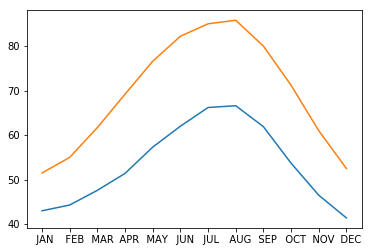

In [29]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot MEAN_TEMP from seattle_weather against the MONTH
ax.plot(seattle_weather["MONTH"], seattle_weather['MEAN_TEMP'])

# Plot MEAN_TEMP from austin_weather against MONTH
ax.plot(austin_weather["MONTH"], austin_weather['MEAN_TEMP'])

# Call the show function
plt.show()

### Customizing data appearance

We can customize the appearance of data in our plots, while adding the data to the plot, using key-word arguments to the plot command.

In this exercise, you will customize the appearance of the markers, the linestyle that is used, and the color of the lines and markers for your data. 

- Call plt.plot to plot "MEAN_TEMP" against "MONTHS" in both DataFrames.  
- Pass the color key-word arguments to these commands to set the color of the Seattle data to blue ('b') and the Austin data to red ('r'). 
- Pass the marker key-word arguments to these commands to set the Seattle data to circle markers ('o') and the Austin markers to triangles pointing downwards ('v').  
- Pass the linestyle key-word argument to use dashed lines for the data from both cities ('--').  


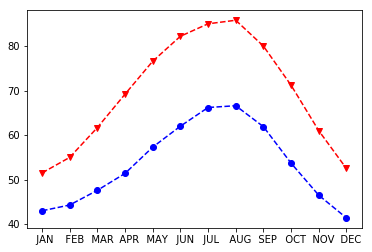

In [31]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MEAN_TEMP"], color="b", marker="o", linestyle="--")

# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MEAN_TEMP"], color="r", marker="v", linestyle="--")

# Call show to display the resulting plot
plt.show()

### Customizing axis labels and adding titles

Customizing the axis labels requires using the `set_xlabel` and `set_ylabel` methods of the Axes object. Adding a title uses the `set_title` method.

In this exercise, you will customize the content of the axis labels and add a title to a plot.

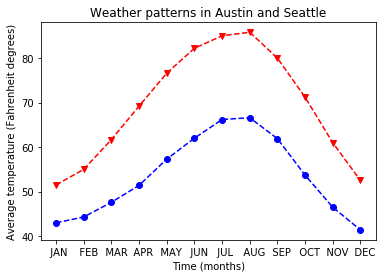

In [32]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MEAN_TEMP"], color="b", marker="o", linestyle="--")

# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MEAN_TEMP"], color="r", marker="v", linestyle="--")

# Customize the x-axis label
ax.set_xlabel("Time (months)")

# Customize the y-axis label
ax.set_ylabel("Average temperature (Fahrenheit degrees)")

# Add the title
ax.set_title("Weather patterns in Austin and Seattle")

# Display the figure
plt.show()

### Creating small multiples with plt.subplots

Small multiples are used to plot several datasets side-by-side. In Matplotlib, small multiples can be created using the `plt.subplots()` function. The first argument is the number of rows in the array of Axes objects generate and the second argument is the number of columns. In this exercise, you will use the Austin and Seattle data to practice creating and populating an array of subplots.

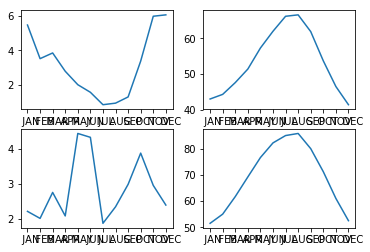

In [45]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather['MONTH'], seattle_weather['NORM_PRECIP'])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather['MONTH'], seattle_weather['MEAN_TEMP'])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather['MONTH'], austin_weather['NORM_PRECIP'])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather['MONTH'], austin_weather['MEAN_TEMP'])
plt.show()

### Small multiples with shared y axis

When creating small multiples, it is often preferable to make sure that the different plots are displayed with the same scale used on the y-axis. This can be configured by setting the `sharey` key-word to `True`.

In this exercise, you will create a Figure with two Axes objects that share their y-axis.
**Note:** if there is only one column in subplots, then we address axis as `ax[row]` and not as `ax[[row, col]`

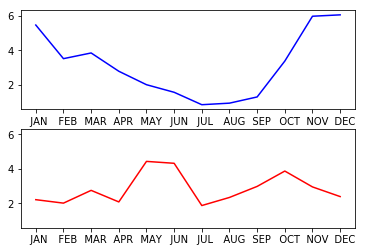

In [46]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather['MONTH'], seattle_weather['NORM_PRECIP'], color = "b")

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather['MONTH'], austin_weather['NORM_PRECIP'], color = "r")

plt.show()